In [1]:
import json
import requests
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# From openuv 
api_key = "openuv-7orcjfrlo62ivj9-io"

# headers for api call
headers = {
    "x-access-token": api_key,
    "Content-Type": "application/json"
}

lat = 34.11
lng = -117.70
alt = 100
dt = datetime.now()
# Create url with api key above

url = "https://api.openuv.io/api/v1/forecast?lat={}&lng={}&alt={}&dt={}".format(lat,lng,alt,dt)

request = requests.get(url= url, headers=headers)
data = request.json()
#Convert JSON into dataframe
df = pd.json_normalize(data['result'])

#Get rid of extra data
df = df.drop('sun_position.azimuth', axis = 1)
df = df.drop('sun_position.altitude', axis = 1)

#Convert to time index
df['uv_time'] = pd.to_datetime(df['uv_time'], format='ISO8601')
df['Time'] = pd.to_datetime(df['uv_time'])

#Get rid of old formatted time
df = df.drop('uv_time', axis = 1)

#Format time
df['Time'] = df['Time'].dt.strftime('%H')
print(df)

        uv Time
0   0.0000   14
1   0.2242   15
2   0.8765   16
3   1.8651   17
4   2.9251   18
5   3.6080   19
6   3.4347   20
7   2.7620   21
8   1.6103   22
9   0.7134   23
10  0.1529   00


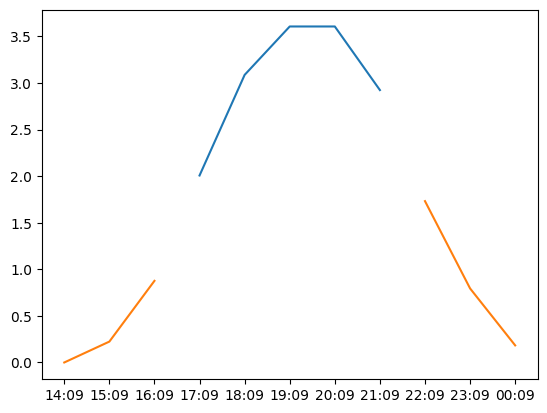

In [15]:
upper = 6.0
lower = 5.0
supper = np.ma.masked_where(df['uv'] < upper, df['uv'])
slower = np.ma.masked_where(df['uv'] > lower, df['uv'])
smiddle = np.ma.masked_where((df['uv'] < lower) | (df['uv'] > upper), df['uv'])
fig, ax = plt.subplots()
ax.plot(df['Time'],smiddle, df['Time'], slower,df['Time'],supper)
plt.show() 
  